# 
# Breast Cancer ML
# 

### Problem Definition:

This is a supervised learning problem, specifically a classification task.

The goal is to predict whether a tumor is malignant (1) or benign (0) based on medical imaging features.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.feature_selection import RFE

## Data Load and Exploration

In [2]:
df = pd.read_csv("breast-cancer.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.drop(columns=["id", "Unnamed: 32"], inplace=True)

In [7]:
diagnosis_counts=df["diagnosis"].value_counts()
diagnosis_counts

B    357
M    212
Name: diagnosis, dtype: int64

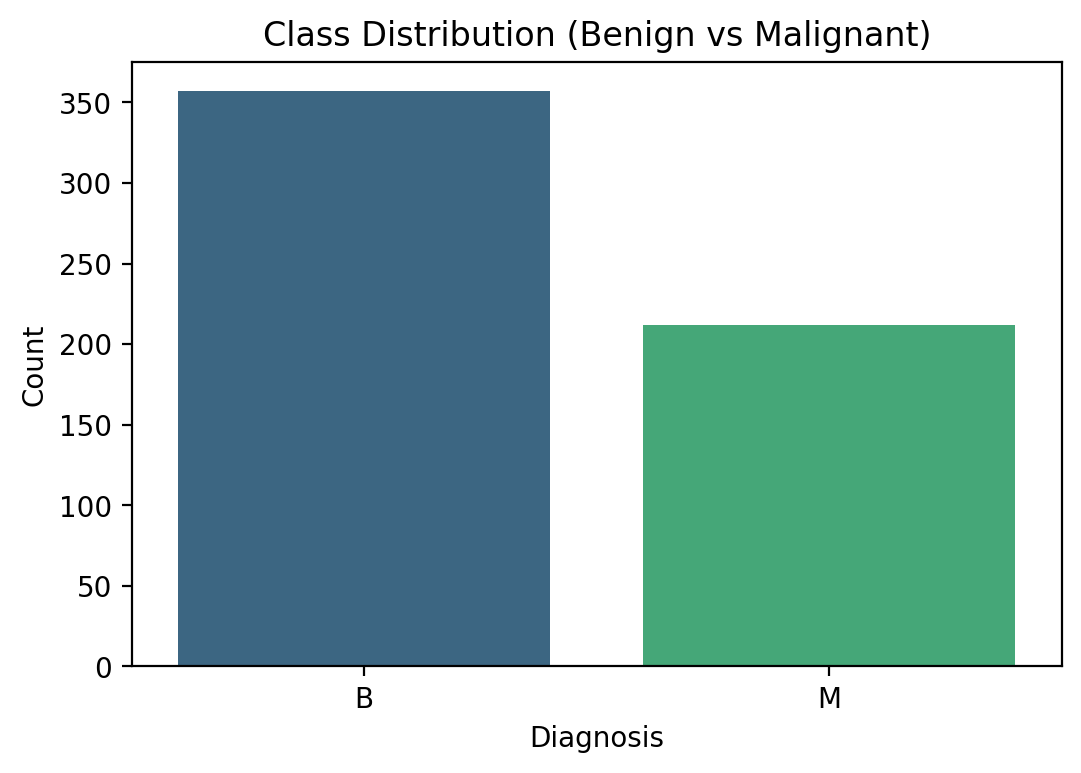

In [10]:
plt.figure(figsize=(6,4), dpi=200)
sns.barplot(x=diagnosis_counts.index, y=diagnosis_counts.values, palette="viridis")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.title("Class Distribution (Benign vs Malignant)")
plt.show()

In [9]:
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})

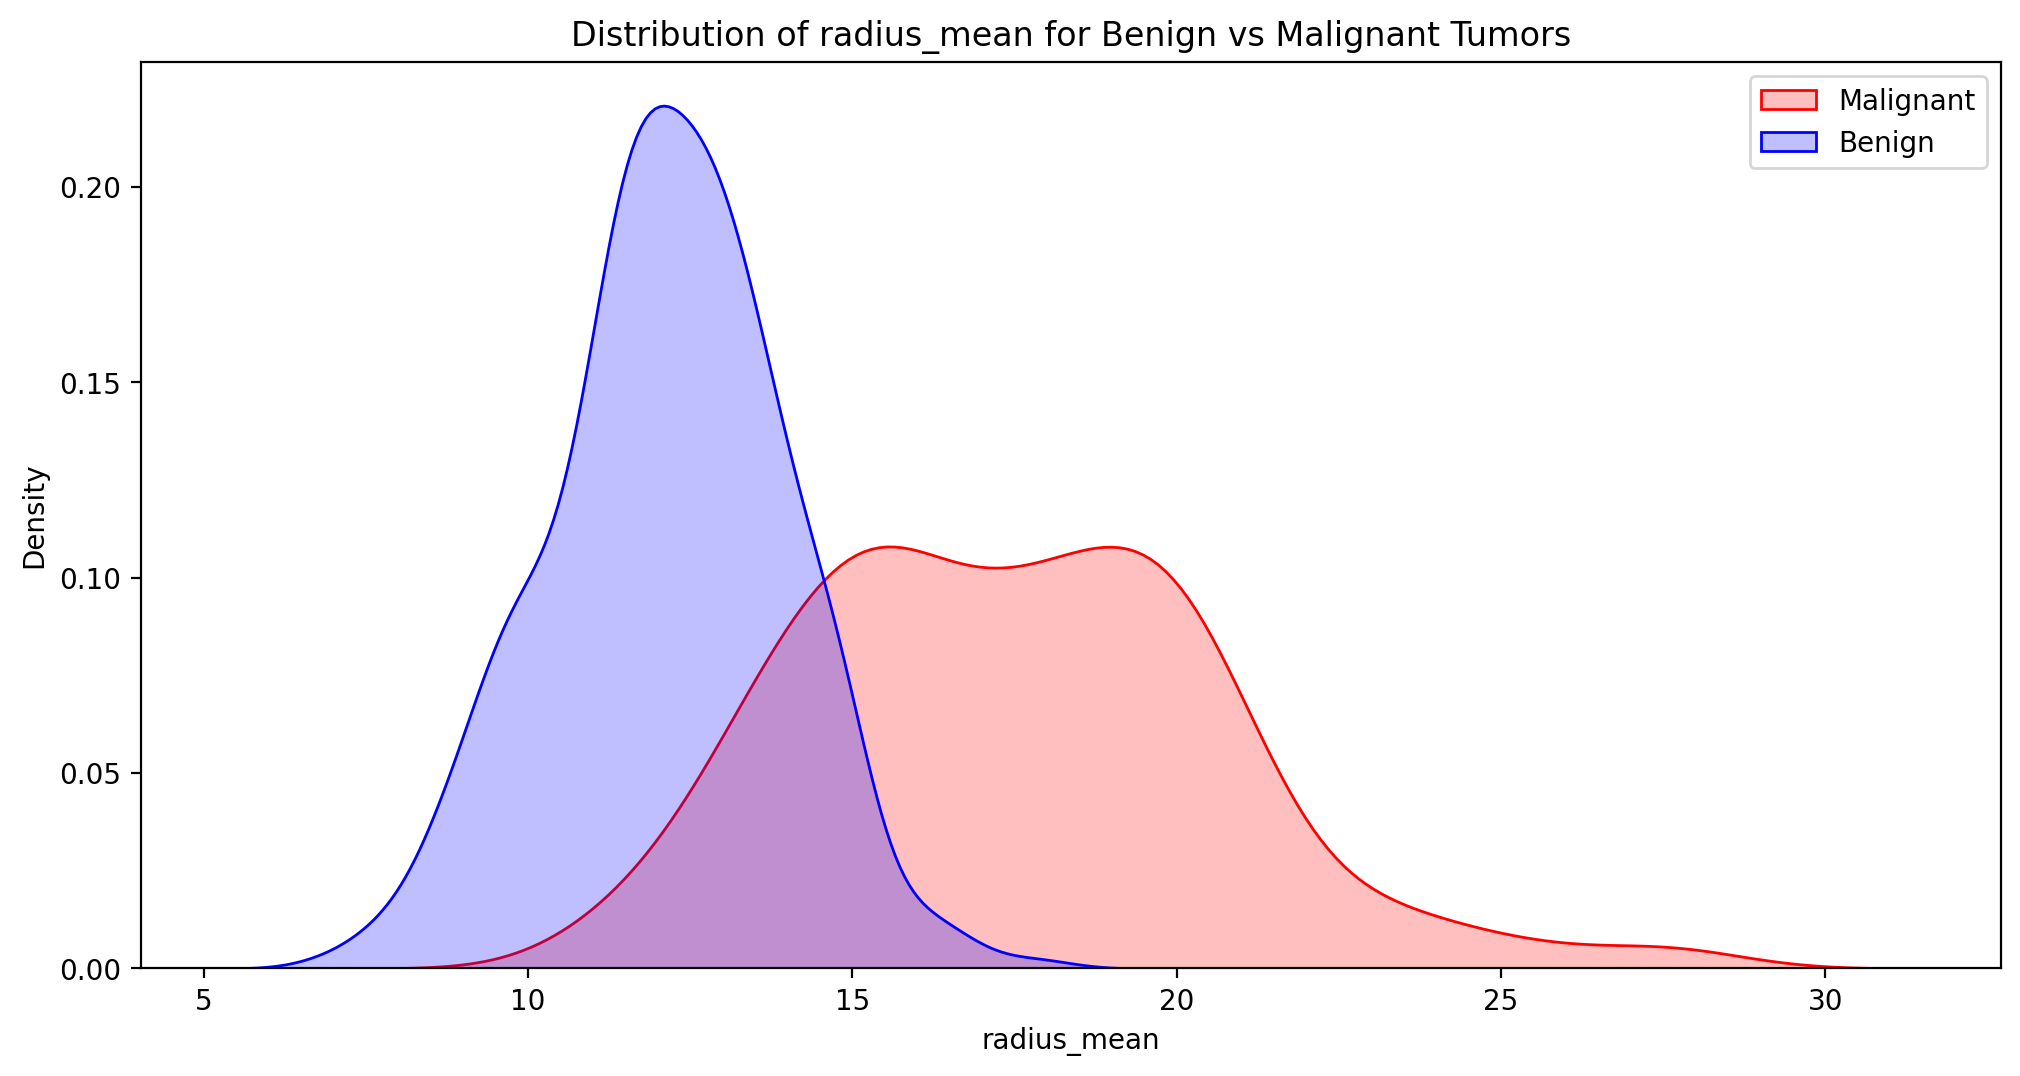

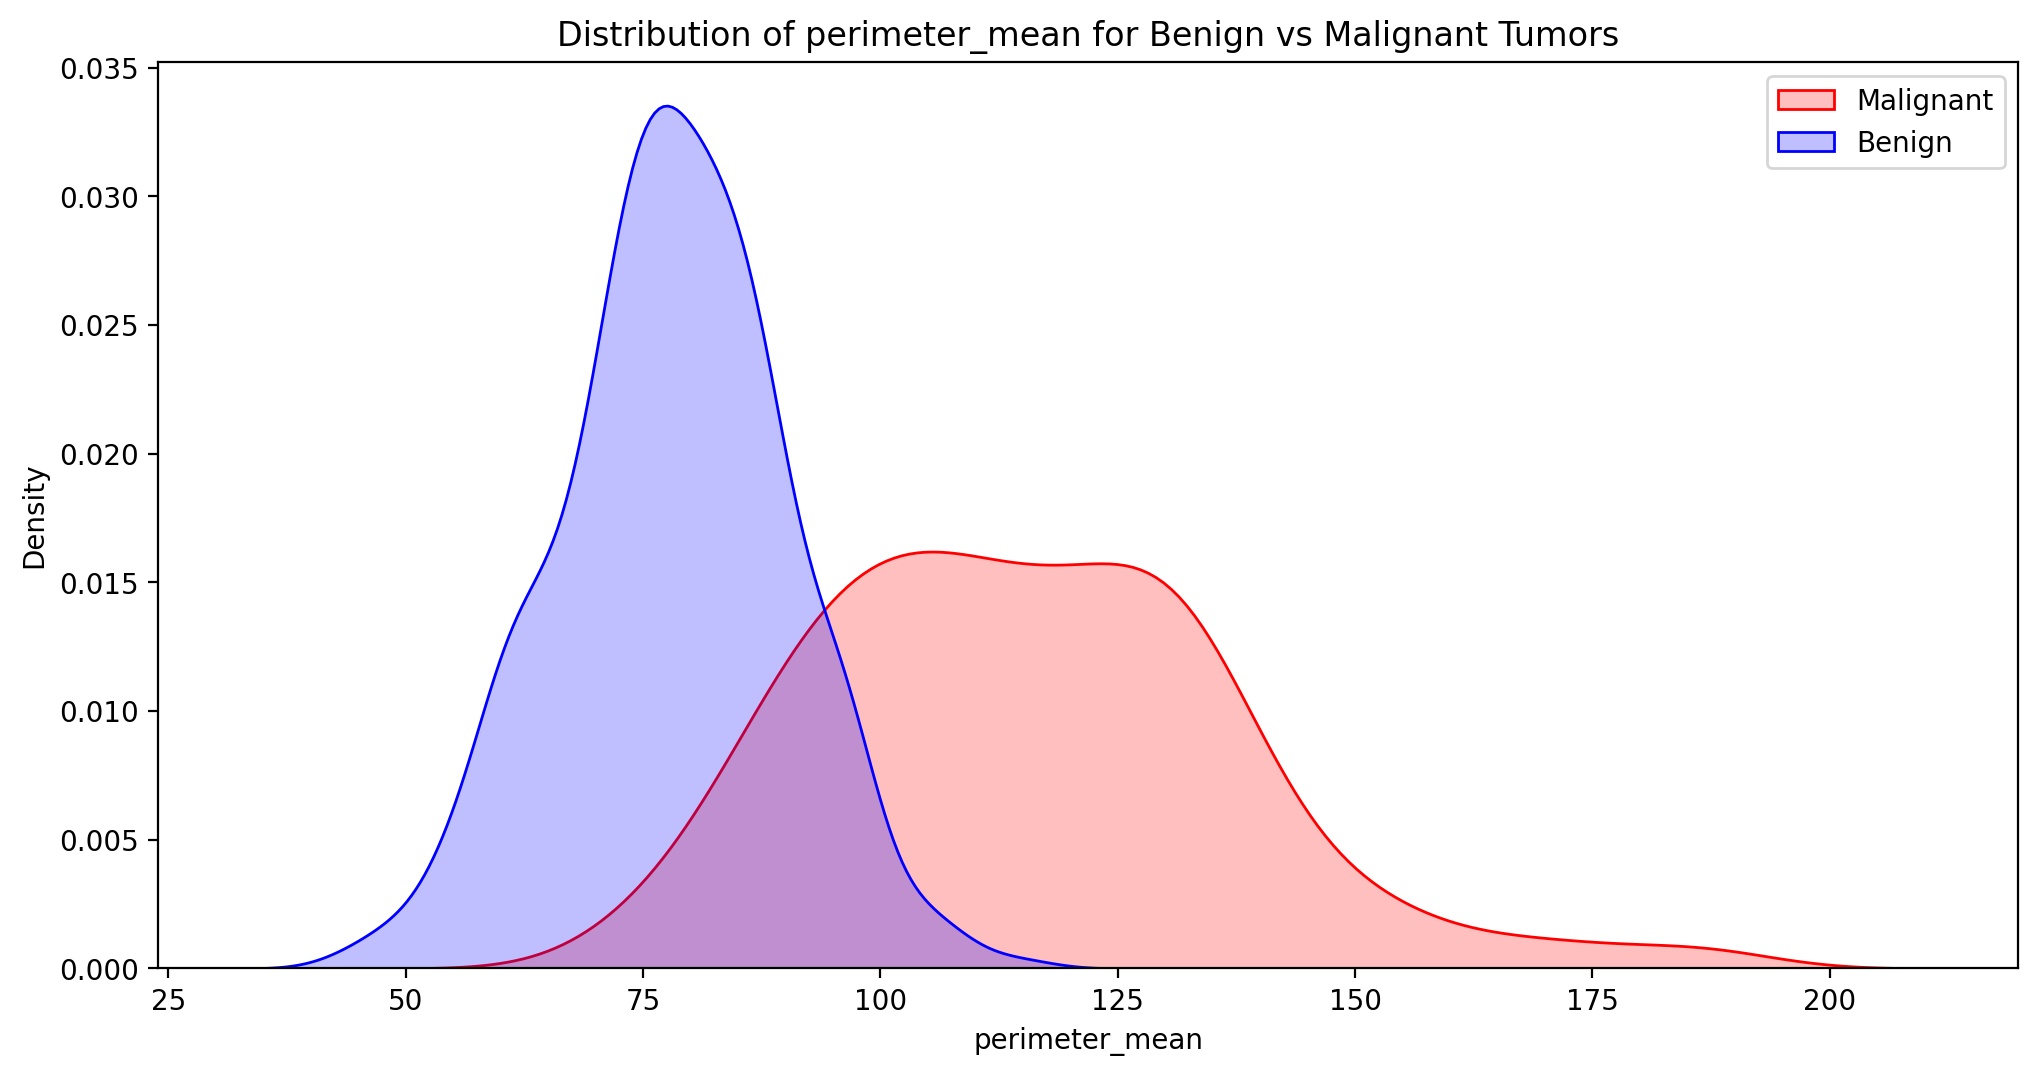

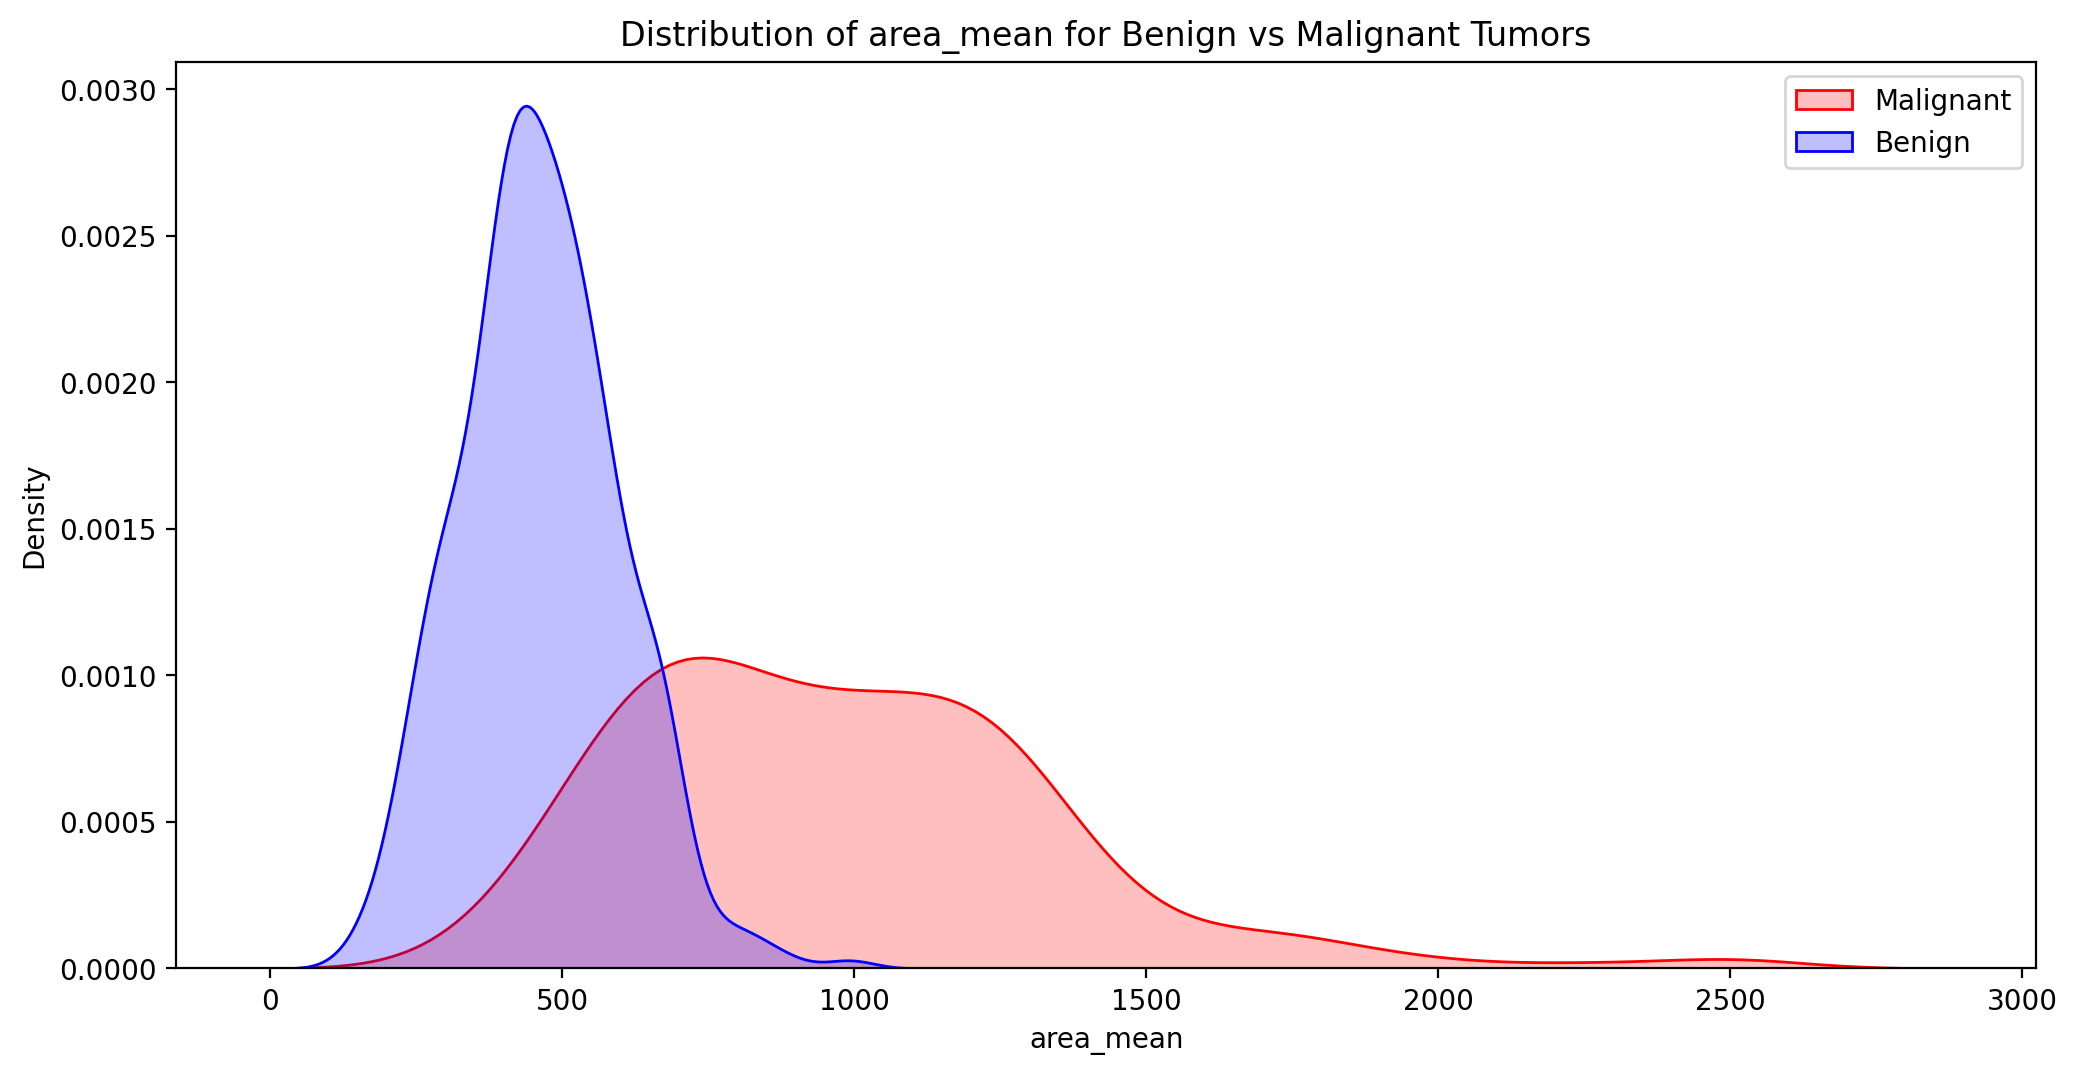

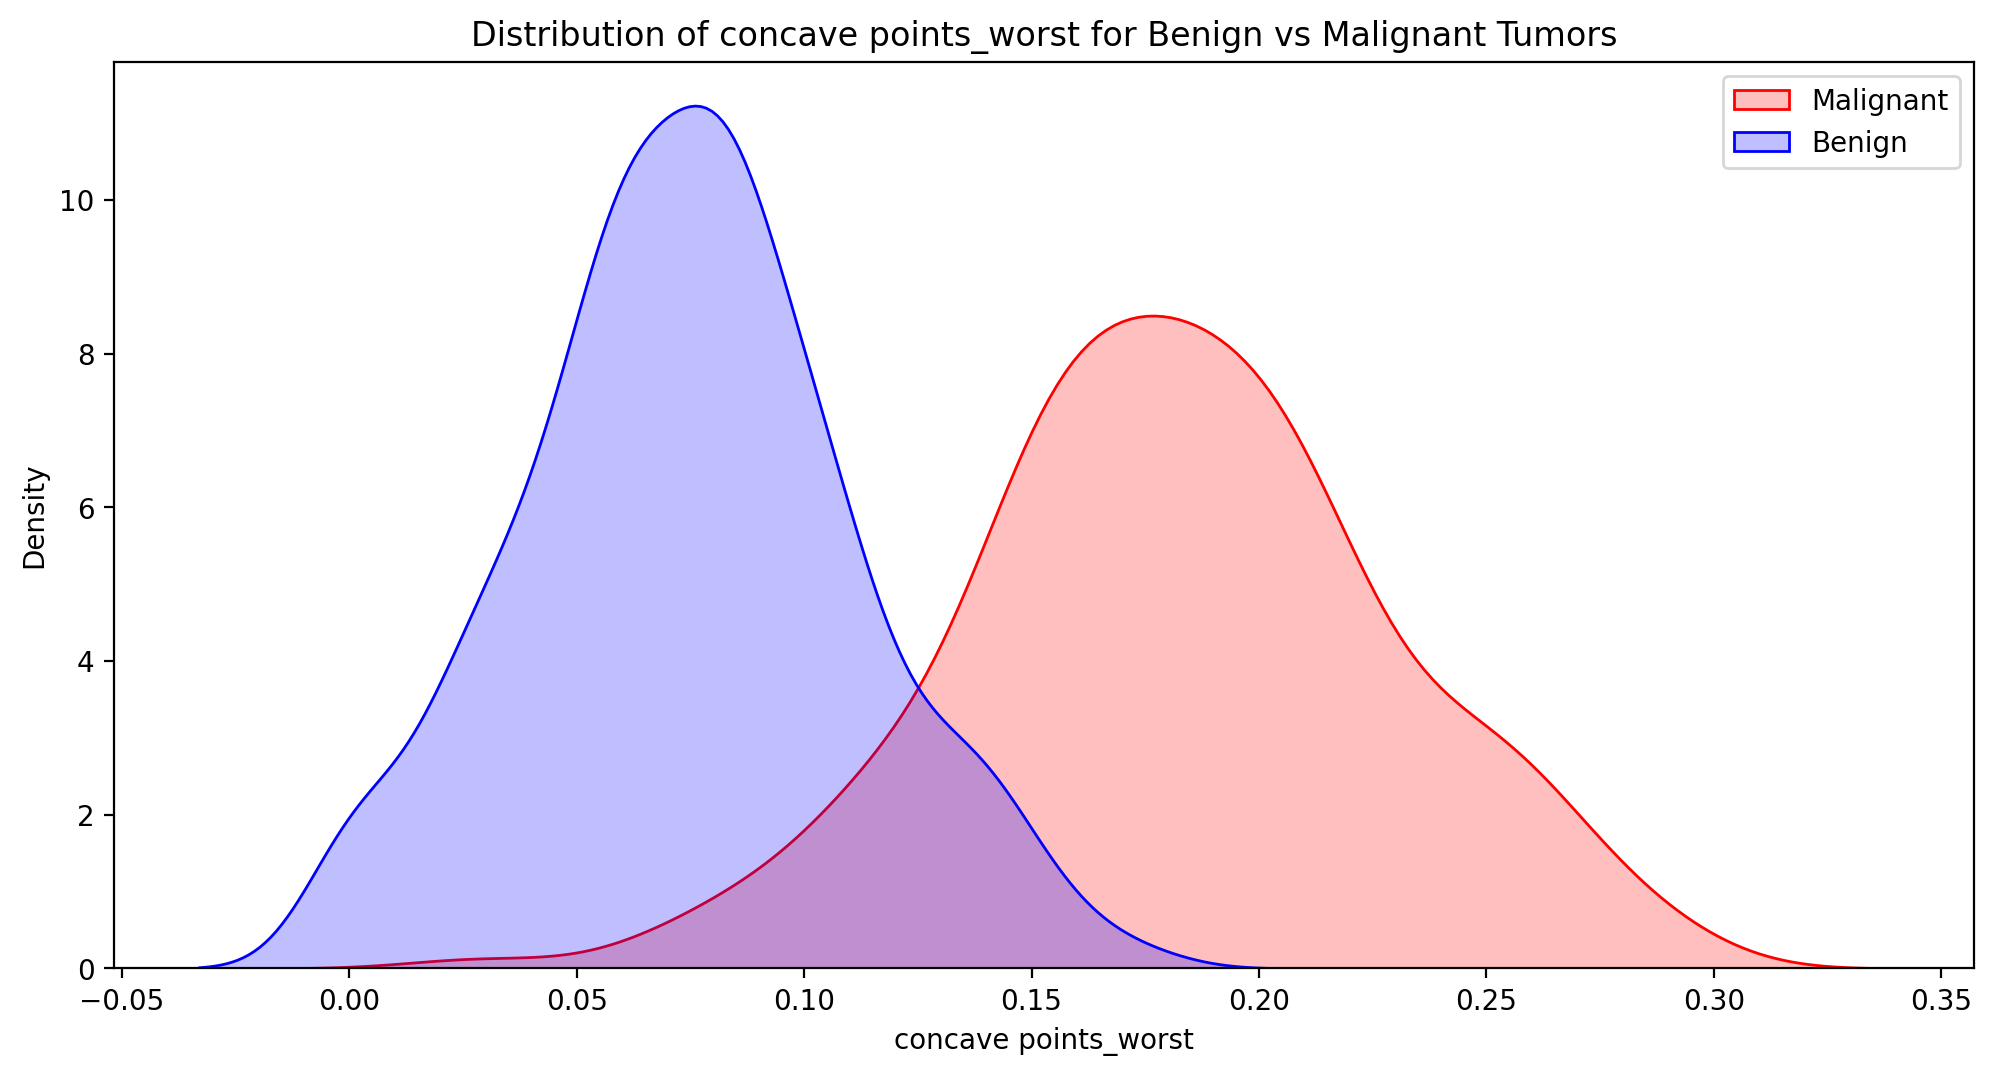

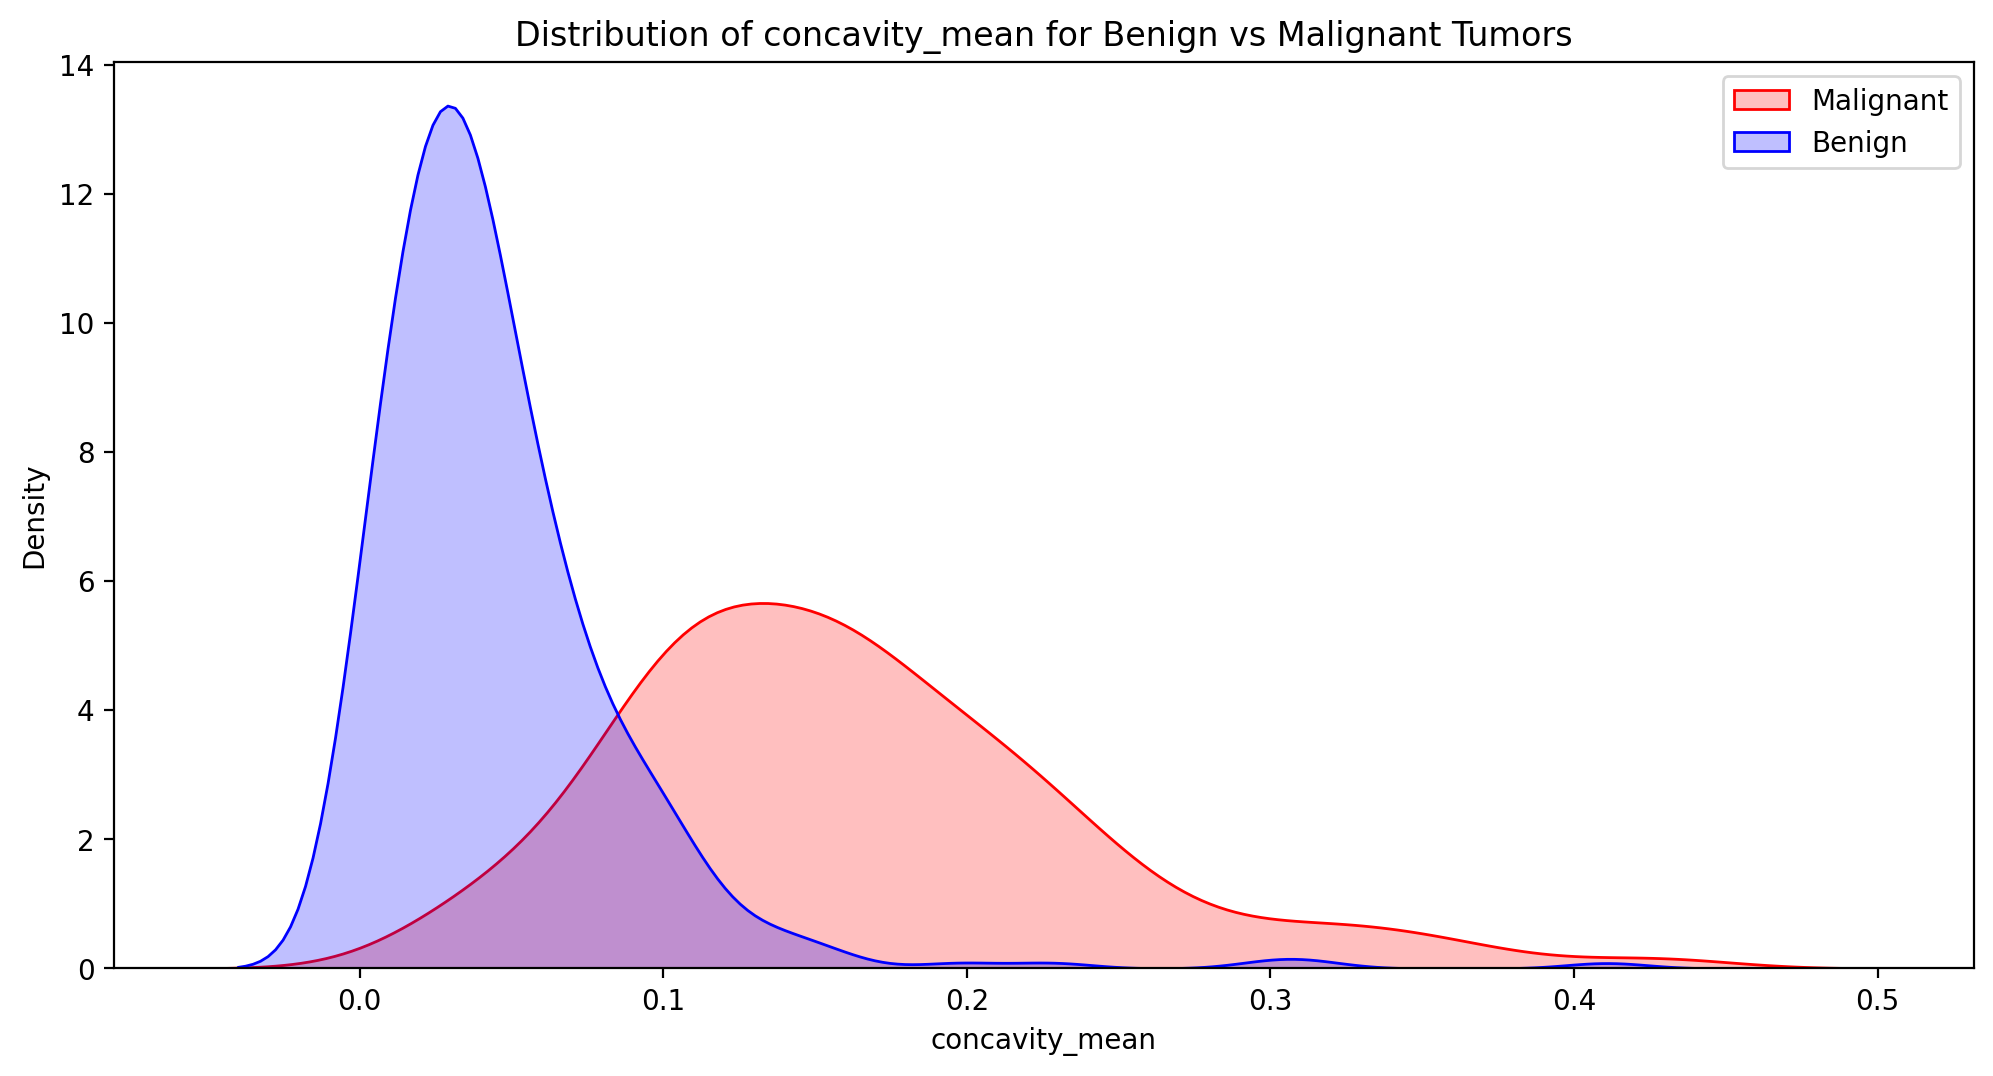

In [11]:
selected_features = ["radius_mean", "perimeter_mean", "area_mean", "concave points_worst", "concavity_mean"]

for feature in selected_features:
    plt.figure(figsize=(12,6), dpi=200)
    sns.kdeplot(df[df["diagnosis"] == 1][feature], shade=True, label="Malignant", color="red")
    sns.kdeplot(df[df["diagnosis"] == 0][feature], shade=True, label="Benign", color="blue")
    plt.title(f"Distribution of {feature} for Benign vs Malignant Tumors")
    plt.legend()
    plt.show()

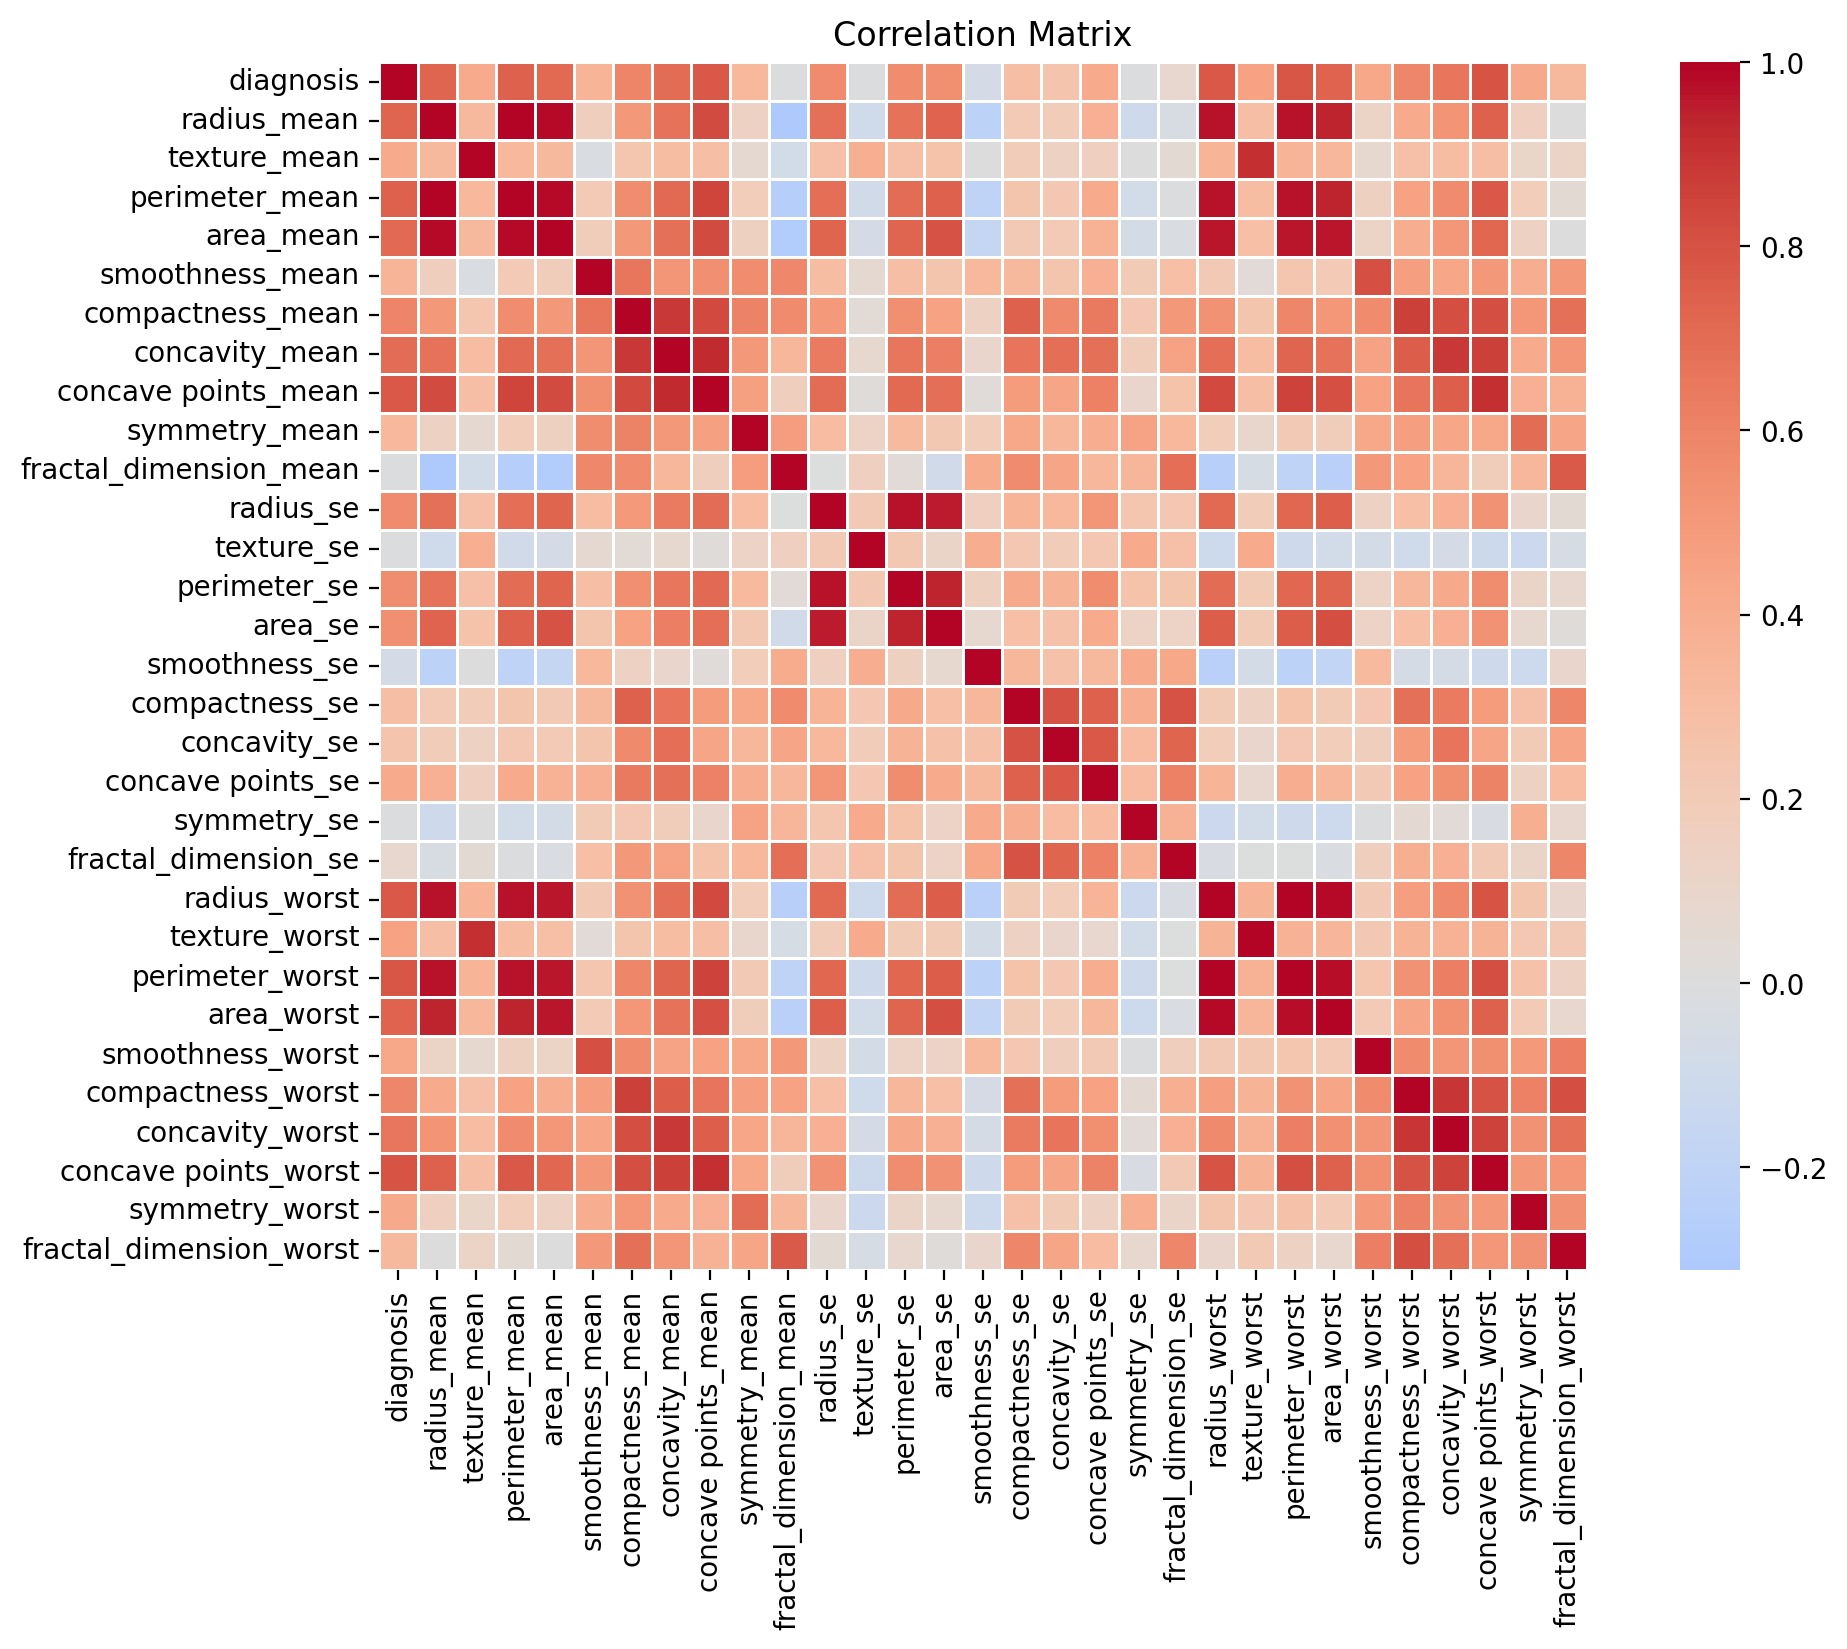

In [12]:
correlation_matrix = df.corr()

plt.figure(figsize=(12,8), dpi=200)
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, linewidths=0.5, 
            cbar=True, center=0, square=True)

plt.title("Correlation Matrix")
plt.show()

In [13]:
correlation_with_target = df.corr()["diagnosis"].sort_values(ascending=False)
correlation_with_target.head(10)

diagnosis               1.000000
concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
Name: diagnosis, dtype: float64

## Model Training and Evaluation

In [14]:
X = df.drop(columns=["diagnosis"])
y = df["diagnosis"]

In [15]:
# Feature Selection using Recursive Feature Elimination (RFE)
selector = RFE(RandomForestClassifier(), n_features_to_select=10)
selector.fit(X, y)
X_selected = X.loc[:, selector.support_]
print("Selected Features: ", X_selected.columns)

Selected Features:  Index(['perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

In [17]:
# Standardize the feature values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(probability=True)
}

In [19]:
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)
    y_proba_test = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    roc_auc_test = roc_auc_score(y_test, y_proba_test) if y_proba_test is not None else "N/A"
    results[name] = {"Train Accuracy": accuracy_train, "Test Accuracy": accuracy_test, "ROC-AUC Test": roc_auc_test}
    print(f"{name} - Train Accuracy: {accuracy_train:.4f}, Test Accuracy: {accuracy_test:.4f}, ROC-AUC: {roc_auc_test if y_proba_test is not None else 'N/A'}")
    print("\nConfusion Matrix (Test Set):")
    print(confusion_matrix(y_test, y_pred_test))
    print("\nClassification Report (Test Set):")
    print(classification_report(y_test, y_pred_test))
    print("---------------------------------------------")

Logistic Regression - Train Accuracy: 0.9736, Test Accuracy: 0.9737, ROC-AUC: 0.9973544973544974

Confusion Matrix (Test Set):
[[71  1]
 [ 2 40]]

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

---------------------------------------------
Random Forest - Train Accuracy: 1.0000, Test Accuracy: 0.9737, ROC-AUC: 0.9966931216931217

Confusion Matrix (Test Set):
[[72  0]
 [ 3 39]]

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114

In [20]:
# Cross-validation to validate performance on training set
cv_results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_results[name] = {"CV Mean Accuracy": scores.mean(), "CV Std Dev": scores.std()}

cv_results_df = pd.DataFrame(cv_results).T
print("\nCross-Validation Performance:")
print(cv_results_df)


Cross-Validation Performance:
                        CV Mean Accuracy  CV Std Dev
Logistic Regression             0.971429    0.017855
Random Forest                   0.958242    0.038945
Support Vector Machine          0.973626    0.020382


In [21]:
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df)


Model Performance Comparison:
                        Train Accuracy  Test Accuracy  ROC-AUC Test
Logistic Regression           0.973626       0.973684      0.997354
Random Forest                 1.000000       0.973684      0.996693
Support Vector Machine        0.978022       0.982456      0.996362


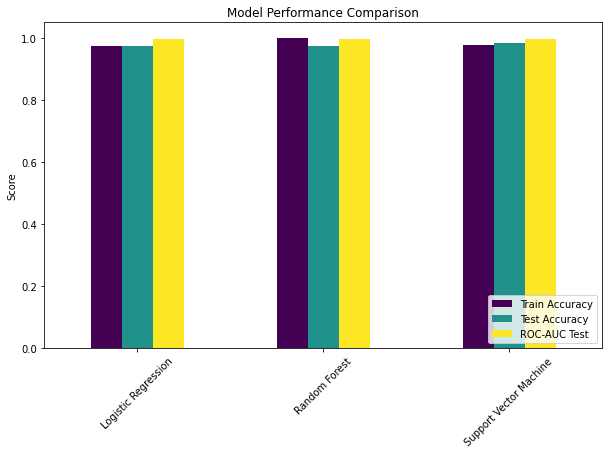

In [22]:
results_df.plot(kind='bar', figsize=(10,6), colormap='viridis')
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.show()

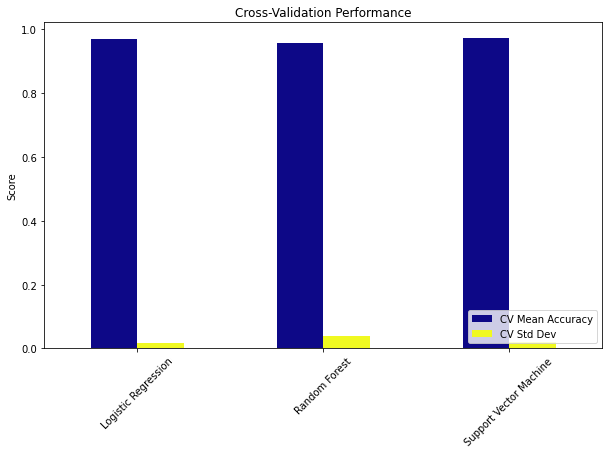

In [23]:
cv_results_df.plot(kind='bar', figsize=(10,6), colormap='plasma')
plt.title("Cross-Validation Performance")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.show()

In [32]:
# Save the best model (SVM) and scaler for future use
best_model = models["Support Vector Machine"]
joblib.dump(best_model, "best_model.pkl")
joblib.dump(scaler, "scaler.pkl")
print("Best model and scaler saved successfully!")

Best model and scaler saved successfully!
